In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import seaborn as sns

In [42]:
df=pd.read_csv('911 2.csv',parse_dates=['timeStamp'],dayfirst=True)

In [43]:
df[:10]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [20]:
twp_count=df['twp'].value_counts()

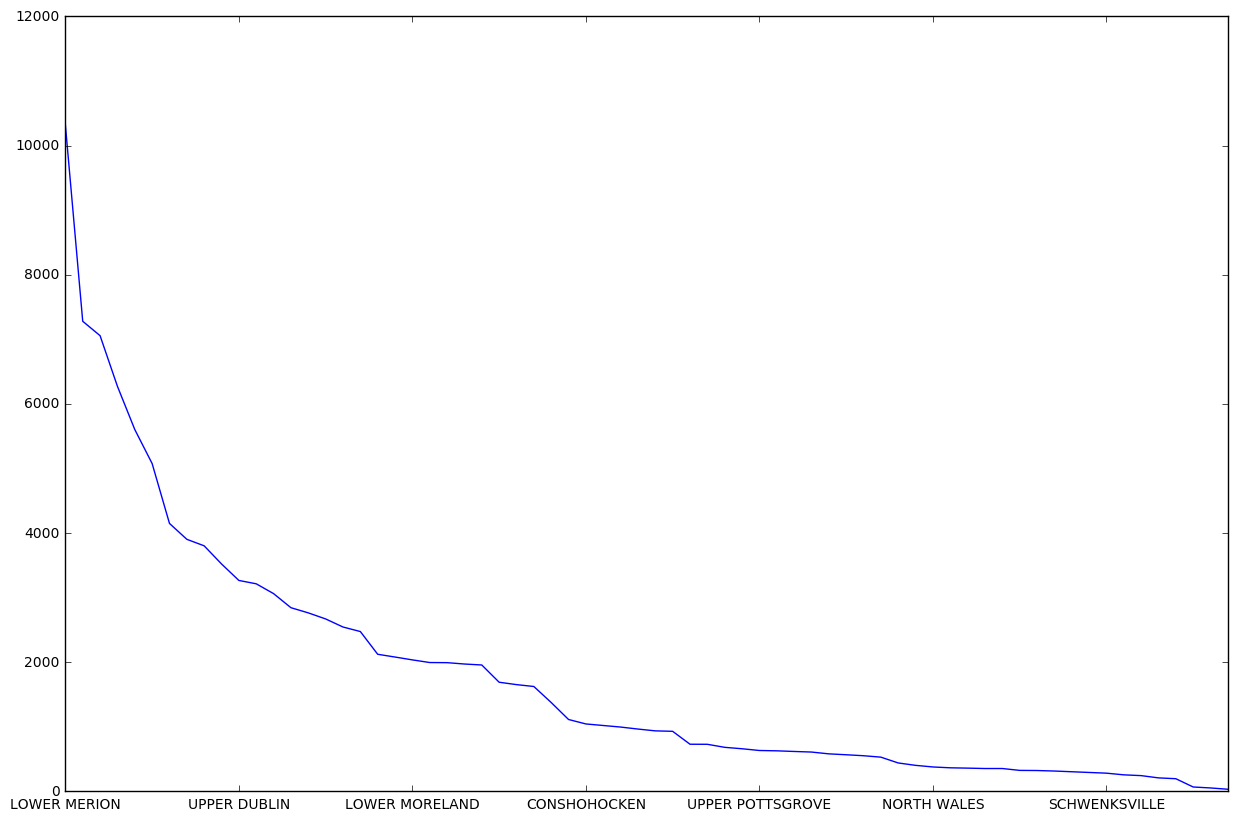

In [23]:
twp_count.plot(figsize=(15,10))

In [33]:
twptitle=df[['twp','title']][:10]

In [28]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -             27981
Traffic: DISABLED VEHICLE -              9240
Fire: FIRE ALARM                         6790
EMS: RESPIRATORY EMERGENCY               6077
EMS: CARDIAC EMERGENCY                   6025
EMS: FALL VICTIM                         5904
EMS: VEHICLE ACCIDENT                    4824
Traffic: ROAD OBSTRUCTION -              3770
EMS: SUBJECT IN PAIN                     3286
EMS: HEAD INJURY                         3210
EMS: UNKNOWN MEDICAL EMERGENCY           2293
EMS: SYNCOPAL EPISODE                    2090
Fire: VEHICLE ACCIDENT                   1997
EMS: SEIZURES                            1976
EMS: GENERAL WEAKNESS                    1763
Fire: FIRE INVESTIGATION                 1754
EMS: ABDOMINAL PAINS                     1745
EMS: ALTERED MENTAL STATUS               1681
EMS: MEDICAL ALERT ALARM                 1592
EMS: OVERDOSE                            1491
EMS: HEMORRHAGING                        1485
EMS: CVA/STROKE                   

In [99]:
title_count=df['title'].value_counts()
title_count[:20]

Traffic: VEHICLE ACCIDENT -       27981
Traffic: DISABLED VEHICLE -        9240
Fire: FIRE ALARM                   6790
EMS: RESPIRATORY EMERGENCY         6077
EMS: CARDIAC EMERGENCY             6025
EMS: FALL VICTIM                   5904
EMS: VEHICLE ACCIDENT              4824
Traffic: ROAD OBSTRUCTION -        3770
EMS: SUBJECT IN PAIN               3286
EMS: HEAD INJURY                   3210
EMS: UNKNOWN MEDICAL EMERGENCY     2293
EMS: SYNCOPAL EPISODE              2090
Fire: VEHICLE ACCIDENT             1997
EMS: SEIZURES                      1976
EMS: GENERAL WEAKNESS              1763
Fire: FIRE INVESTIGATION           1754
EMS: ABDOMINAL PAINS               1745
EMS: ALTERED MENTAL STATUS         1681
EMS: MEDICAL ALERT ALARM           1592
EMS: OVERDOSE                      1491
Name: title, dtype: int64

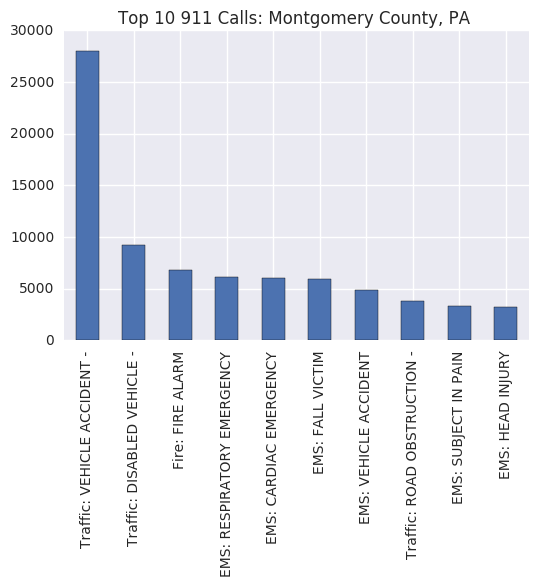

In [107]:
title_count[:10].plot(kind='bar')
plt.title('Top 10 911 Calls: Montgomery County, PA ');

In [36]:
twptitle

,twp,title
0,NEW HANOVER,EMS: BACK PAINS/INJURY
1,HATFIELD TOWNSHIP,EMS: DIABETIC EMERGENCY
2,NORRISTOWN,Fire: GAS-ODOR/LEAK
3,NORRISTOWN,EMS: CARDIAC EMERGENCY
4,LOWER POTTSGROVE,EMS: DIZZINESS
5,LANSDALE,EMS: HEAD INJURY
6,HORSHAM,EMS: NAUSEA/VOMITING
7,SKIPPACK,EMS: RESPIRATORY EMERGENCY
8,LOWER SALFORD,EMS: SYNCOPAL EPISODE
9,PLYMOUTH,Traffic: VEHICLE ACCIDENT -


In [50]:
od = df[df['title'] == "EMS: OVERDOSE"]

In [54]:
od.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 102 to 120439
Data columns (total 9 columns):
lat          1491 non-null float64
lng          1491 non-null float64
desc         1491 non-null object
zip          1383 non-null float64
title        1491 non-null object
timeStamp    1491 non-null datetime64[ns]
twp          1488 non-null object
addr         1491 non-null object
e            1491 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 116.5+ KB


In [58]:
df2=pd.read_csv('911 2.csv',
               usecols=["twp","title","timeStamp"])

In [59]:
df2.head()

,title,timeStamp,twp
0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER
1,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP
2,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN
3,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN
4,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE


In [72]:
od_twp=od['twp'].value_counts()
od_twp=od_twp[:10]

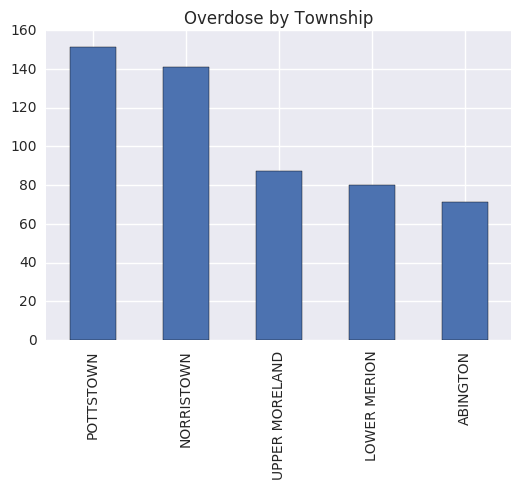

In [111]:
od_twp[:5].plot(kind='bar')
plt.title('Overdose by Township');